#Ejercicio de clasificacion: Iris

### Importar Librerias

In [ ]:
#!pip install scikit-learn

In [ ]:
#!pip install pandas

In [ ]:
#!pip install seaborn

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip install numpy

###Importar Dataset

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris

### Importacion y Creacion de Dataframe Pandas

In [ ]:
import pandas as pd

df = pd.DataFrame(data = iris.data, columns= iris.feature_names)
df['species'] = iris.target

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


##Analisis exploratorio

###Revision de numero de instancias

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


###

###Revision de valores nulos (Importante)

#####Algunos dataset necesitan estar completamente limpios para funcionar, por eso importante revisar este apartado

In [ ]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


###Valores estadisticos

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


###Distribucion de clases

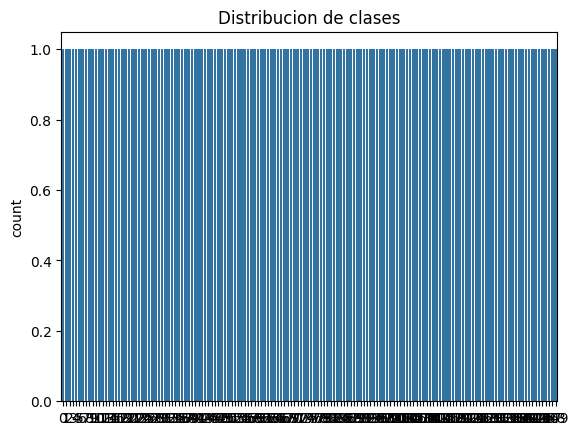

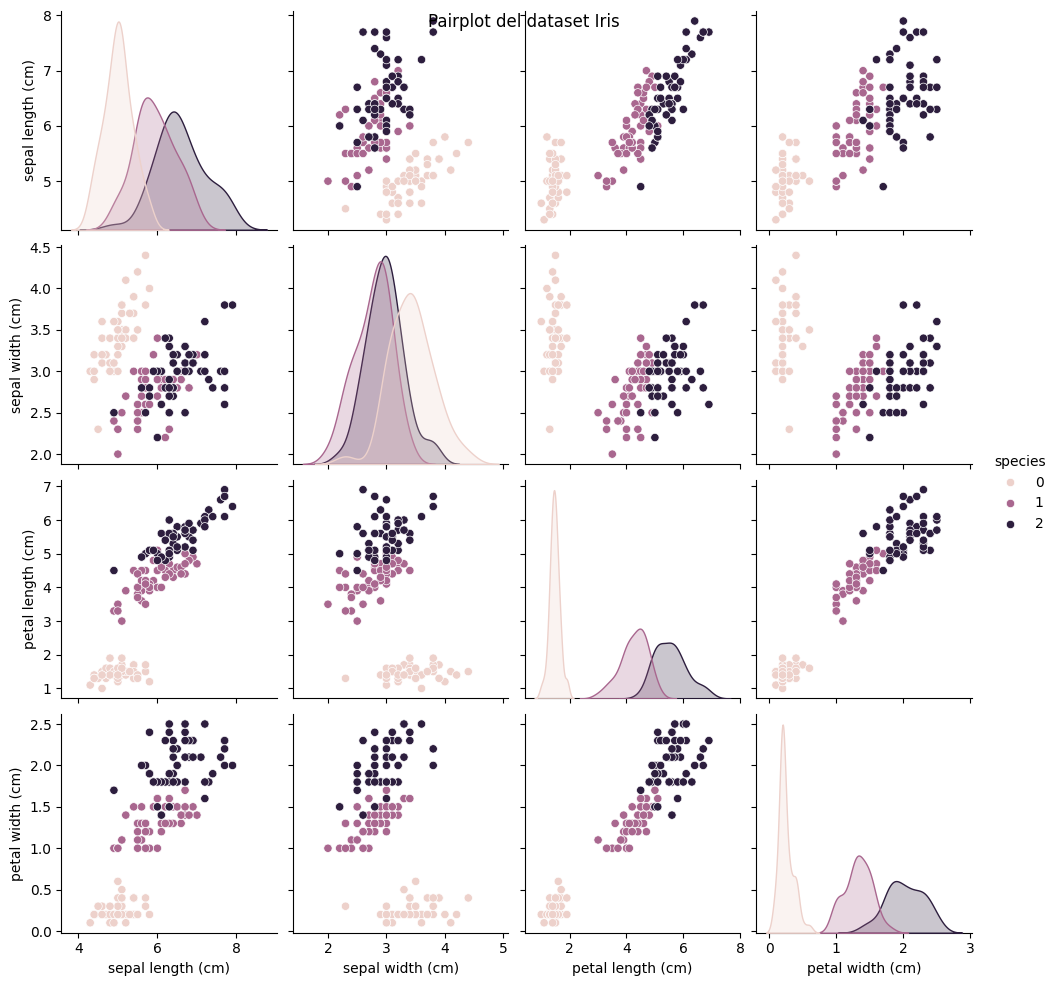

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['species'])
plt.title('Distribucion de clases')

sns.pairplot(df, hue='species')
plt.suptitle('Pairplot del dataset Iris')
plt.show()

##Preparacion de datos

####Separa vector de carateristicas (X_i) y etiquetas (Y)

In [ ]:
X = df.drop('species', axis=1) #Drop sirve para desechar alguna columna y quedarte con todo lo demas.
Y = df['species']

In [ ]:
print(Y)

###Configuracion del modelo con K-fold cross validation

In [ ]:
from sklearn.model_selection import KFold


#n_splits: es el numero de pliegues o k-folds
#shuffle: es mezclarlos.
#random_state : garantiza que la mezcla sera determinista.


kfold = KFold(n_splits=10, shuffle=True, random_state=42)

###Construccion de modelos de clasificacion.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


#Establecer algoritmos de inferencia.
models = {
    "Naive Bayes": GaussianNB(),
    "C4.5 (Decision Tree)": DecisionTreeClassifier(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machines (SVM)": SVC()
}

In [ ]:
models

{'Naive Bayes': GaussianNB(),
 'C4.5 (Decision Tree)': DecisionTreeClassifier(),
 'k-Nearest Neighbors': KNeighborsClassifier(),
 'Support Vector Machines (SVM)': SVC()}

In [ ]:
from sklearn.model_selection import cross_val_score


results = {}

for name, model in models.items():
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
  results[name] = cv_results
  print(f'{name}: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})' )

Naive Bayes: 0.9600 (+/- 0.0533)
C4.5 (Decision Tree): 0.9600 (+/- 0.0533)
k-Nearest Neighbors: 0.9733 (+/- 0.0442)
Support Vector Machines (SVM): 0.9667 (+/- 0.0447)


##Evaluacion de modelos y metricas.

----Naive Bayes-----
Accuracy: 0.96
Confusion Matrix: [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



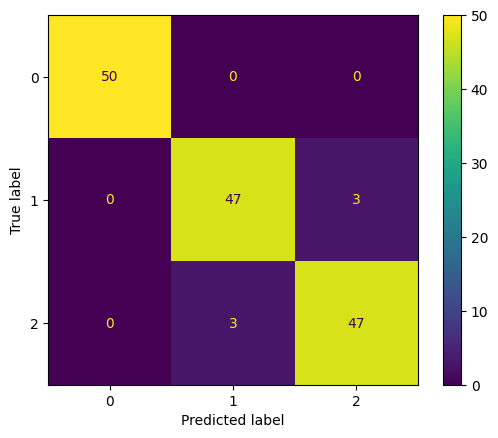

----C4.5 (Decision Tree)-----
Accuracy: 1.0
Confusion Matrix: [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



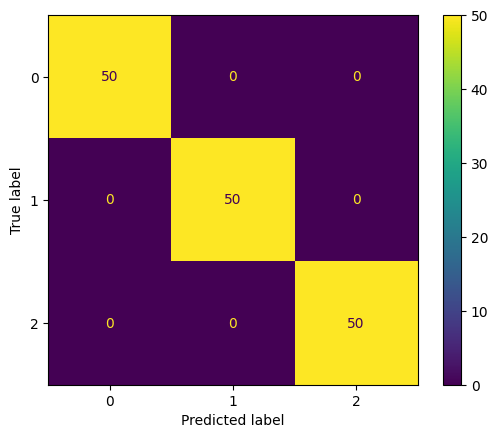

----k-Nearest Neighbors-----
Accuracy: 0.9666666666666667
Confusion Matrix: [[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



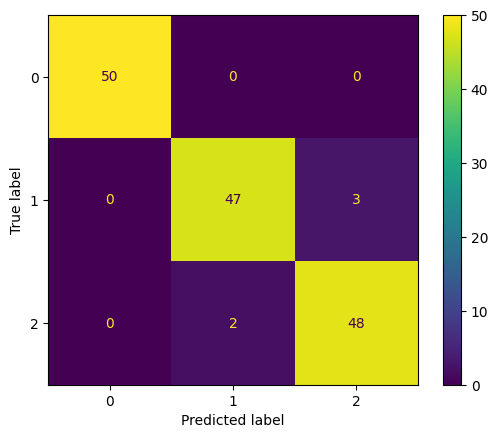

----Support Vector Machines (SVM)-----
Accuracy: 0.9733333333333334
Confusion Matrix: [[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



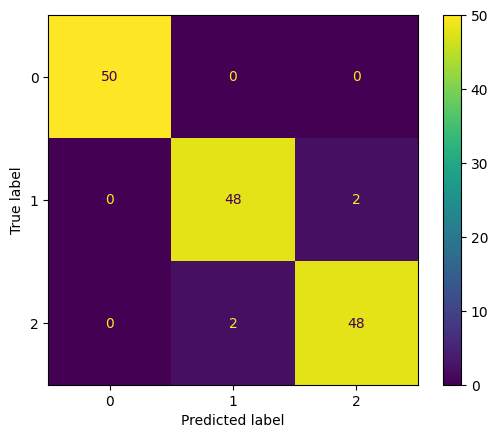

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#Entrenamiento final y evaluacion con metricas detalladas
#NUNCA evaluar con los mismo datos de entrenamiento
#Este ejemplo es con fines informativos


for name, model in models.items():
  model.fit(X, Y) #Este es el entrenamiento con el vector de caracteristicas y clases
  y_pred = model.predict(X) #Esta es la evaluacion

  #Accuracy / Matriz de confusion / Reporte de clasificacion / ES PARA CADA MODELO
  print(f'----{name}-----')
  print("Accuracy:", accuracy_score(Y, y_pred))
  print("Confusion Matrix:", confusion_matrix(Y,y_pred))
  print("Classification Report:", classification_report(Y,y_pred))

  #Matriz de confusion como grafica / DE CADA MODELO
  cm = confusion_matrix(Y,y_pred) #Guardamos la matriz de confusion
  disp = ConfusionMatrixDisplay(confusion_matrix=cm) #
  disp.plot()
  plt.show()

##Interpretacion de Resultados

In [ ]:
#Comparacion de resultados

for name, model in models.items():
  print(f'{name}: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})' )

Naive Bayes: 0.9667 (+/- 0.0447)
C4.5 (Decision Tree): 0.9667 (+/- 0.0447)
k-Nearest Neighbors: 0.9667 (+/- 0.0447)
Support Vector Machines (SVM): 0.9667 (+/- 0.0447)


###Curva ROC

<Figure size 1000x800 with 0 Axes>

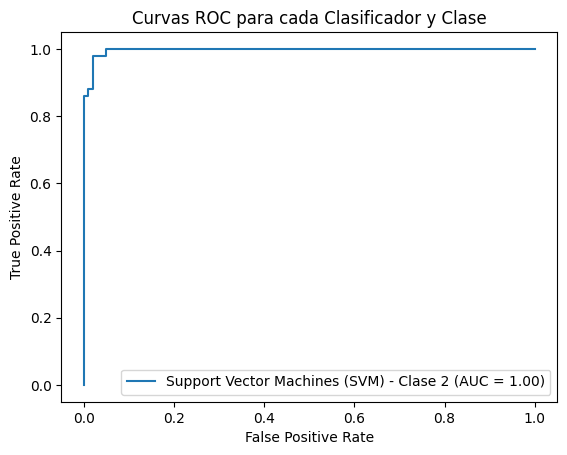

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize


# Binarización de las etiquetas para calcular la curva ROC
y_bin = label_binarize(Y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Inicializar una figura para las curvas ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Entrenar el modelo
    model.fit(X, Y)

    # Predecir las probabilidades
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X)
    else:
        y_score = model.decision_function(X)

    # Computar la curva ROC y el AUC para cada clase
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)

        # Mostrar la curva ROC
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=f"{name} - Clase {i}").plot()

plt.title('Curvas ROC para cada Clasificador y Clase')
plt.show()